<a href="https://colab.research.google.com/github/IshwaryaSriram/EfficentNet-ImageClassification/blob/main/BrainTumor/BrainTumorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
%load_ext tensorboard
import datetime, os
from tensorflow.keras import layers
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

MOUNT DRIVE

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


LOAD TRAINING & TESTING DATA

In [ ]:
X_train = np.load('/drive/MyDrive/DLBrainTumor/X_train.npy')
X_test = np.load('/drive/MyDrive/DLBrainTumor/X_test.npy')
X_val = np.load('/drive/MyDrive/DLBrainTumor/X_val.npy')



Y_train = np.load('/drive/MyDrive/DLBrainTumor/y_train.npy')
Y_test = np.load('/drive/MyDrive/DLBrainTumor/y_test.npy')
Y_val = np.load('/drive/MyDrive/DLBrainTumor/y_val.npy')

In [ ]:
X_train = np.stack((X_train,)*3, axis=-1)
X_val = np.stack((X_val,)*3, axis=-1)

In [ ]:
X_test = np.stack((X_test,)*3, axis=-1)

In [ ]:
Y_train.shape

(2870,)

In [ ]:
#importing EfficientNet Model
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
X_train.shape

(2870, 224, 224, 3)

MODEL

In [ ]:
base_model_imgnet = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224,224,3))
# base_model_ns = EfficientNetB0(include_top=False, weights="efficientnetb0_notop.h5", input_shape=(224,224,3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model_imgnet.trainable = False

model_1 = tf.keras.Sequential([
    base_model_imgnet,
    tf.keras.layers.BatchNormalization(name='batch_norm1'),
    # tf.keras.layers.Conv2D(20, 1, activation='relu', name='conv1'),
    # tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'),
    tf.keras.layers.BatchNormalization(name='batch_norm2'),
    tf.keras.layers.Dropout(0.2, name="dropout2"),
    # tf.keras.layers.Dense(1, activation='sigmoid',name = 'output') 
    tf.keras.layers.Dense(4, activation='softmax', name='output')
], name="EfficientNetB0")

MODEL SUMMARY

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_1.compile(optimizer = opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_1.summary()

Model: "EfficientNetB0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_norm1 (BatchNormaliza  (None, 7, 7, 1280)       5120      
 tion)                                                           
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 batch_norm2 (BatchNormaliza  (None, 1280)             5120      
 tion)                                                           
                                                                 
 dropout2 (Dropout)          (None, 1280)              0         
                                                    

COMPILING THE MODEL

In [ ]:
hist_1 = model_1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=15,shuffle=True,verbose=2,batch_size=50)


Epoch 1/15
58/58 - 25s - loss: 0.9198 - accuracy: 0.7575 - val_loss: 0.8072 - val_accuracy: 0.6257 - 25s/epoch - 440ms/step
Epoch 2/15
58/58 - 5s - loss: 0.5235 - accuracy: 0.8589 - val_loss: 0.4232 - val_accuracy: 0.8324 - 5s/epoch - 90ms/step
Epoch 3/15
58/58 - 5s - loss: 0.5574 - accuracy: 0.8502 - val_loss: 0.2944 - val_accuracy: 0.8659 - 5s/epoch - 90ms/step
Epoch 4/15
58/58 - 5s - loss: 0.6108 - accuracy: 0.8449 - val_loss: 0.3885 - val_accuracy: 0.8603 - 5s/epoch - 90ms/step
Epoch 5/15
58/58 - 5s - loss: 0.5032 - accuracy: 0.8617 - val_loss: 0.1781 - val_accuracy: 0.9441 - 5s/epoch - 90ms/step
Epoch 6/15
58/58 - 5s - loss: 0.5450 - accuracy: 0.8641 - val_loss: 0.3113 - val_accuracy: 0.8827 - 5s/epoch - 90ms/step
Epoch 7/15
58/58 - 5s - loss: 0.5291 - accuracy: 0.8749 - val_loss: 0.1942 - val_accuracy: 0.9162 - 5s/epoch - 90ms/step
Epoch 8/15
58/58 - 5s - loss: 0.4908 - accuracy: 0.8735 - val_loss: 0.1151 - val_accuracy: 0.9609 - 5s/epoch - 91ms/step
Epoch 9/15
58/58 - 5s - loss:

In [ ]:
tf.config.run_functions_eagerly(True) # < ----------------


PLOTTING ACCURACY vs EPOCHS GRAPH

In [ ]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

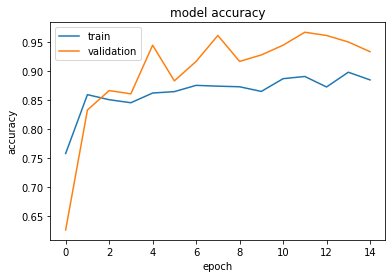

In [ ]:
plot_history(hist_1)
# plot_history(hist_2)

In [ ]:
model_1.save('/drive/MyDrive/DLBrainTumor/model.h5')

Testing the model

In [ ]:
model_1.evaluate(X_test,Y_test)

13/13 [==============================] - 2s 127ms/step - loss: 2.6074 - accuracy: 0.7081


[2.607445478439331, 0.7081218361854553]